## Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.lines as mlines
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm


pd.set_option('display.max_columns', None)


## Load ERA5_LakeTemp.csv file

In [2]:
path = '/Users/alexaterrazas/Desktop/Lake Transfer Function Manuscript/'
df = pd.read_csv(path + 'ERA5_LakeTemp.csv')
print(len(df))

1395


## Figure 1a

5.387 -0.415


/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_59931/791707881.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu')
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to togg

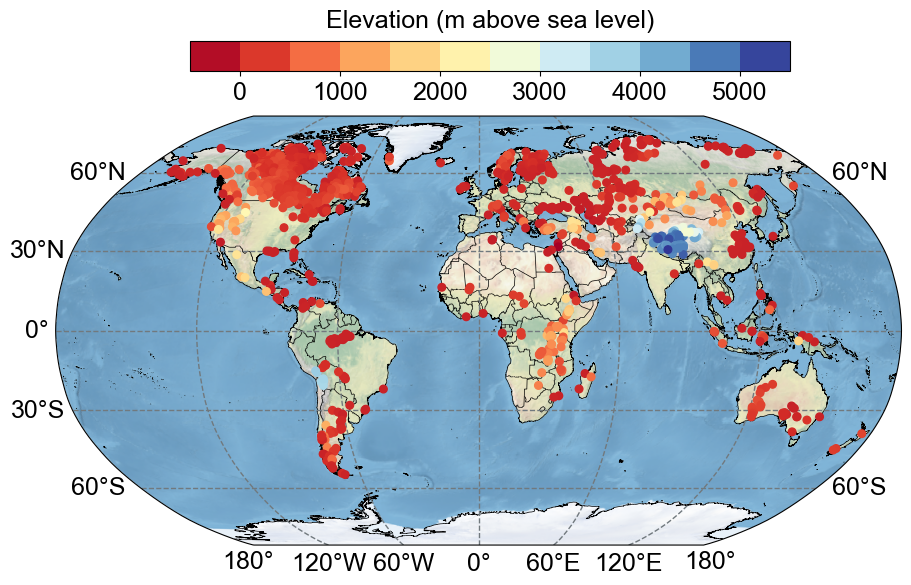

In [3]:
print(df['elevation_km'].max(),
      df['elevation_km'].min())

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18  # Set the font size



cmap = plt.cm.get_cmap('RdYlBu')
 

###########

fig = plt.figure(figsize = (15,15))
grid = plt.GridSpec(53, 6, wspace=0.8, hspace=1)

#MAP, subplot (a)
ax1 = plt.subplot(grid[0:20, 0:], projection=ccrs.Robinson())
ax1.stock_img()
res = '10m'
ax1.add_feature(cfeature.LAND.with_scale(res), facecolor = 'w')
ax1.add_feature(cfeature.OCEAN.with_scale(res), facecolor = '#C7EFFF')
ax1.add_feature(cfeature.BORDERS.with_scale(res), zorder = 1, linewidth = 0.5)
ax1.add_feature(cfeature.COASTLINE.with_scale(res), zorder = 2, linewidth = 0.5)

gridliner = ax1.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 1, linestyle = '--', color = '#71797E')
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = True  
gridliner.xlines = True  
gridliner.xlabel_style = {'size': 18, 'color': 'k'}
gridliner.ylabel_style = {'size': 18, 'color': 'k'}


scatter = ax1.scatter(df['center_long'],
                      df['center_lat'],
                      c=df['Elevation'], 
                      marker = '.',
                      s = 120,
                      cmap = cmap,
                      zorder = 3,
                      transform=ccrs.PlateCarree(),
                      ) 


# Create the colorbar at the top of the figure
bounds = np.arange(-500, 5501, 500)

cbar_ax = fig.add_axes([0.32, 0.91, 0.4, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal', boundaries=bounds)
cbar.ax.xaxis.set_ticks_position('bottom')  # Move ticks to the top
cbar.ax.xaxis.set_label_position('top')  # Move label to the top

# Add a title to the colorbar
cbar.ax.set_title('Elevation (m above sea level)', fontsize=18, pad=10)

plt.tick_params(axis = 'x', labelsize = 18)
plt.tick_params(axis = 'y', labelsize = 18)


# plt.savefig("map3_091124.png", dpi = 1000, facecolor = 'white', bbox_inches='tight')
plt.show() 

## Figure 1b

36.30166666666666 0.2833333333333333


/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_59931/2533711078.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to to

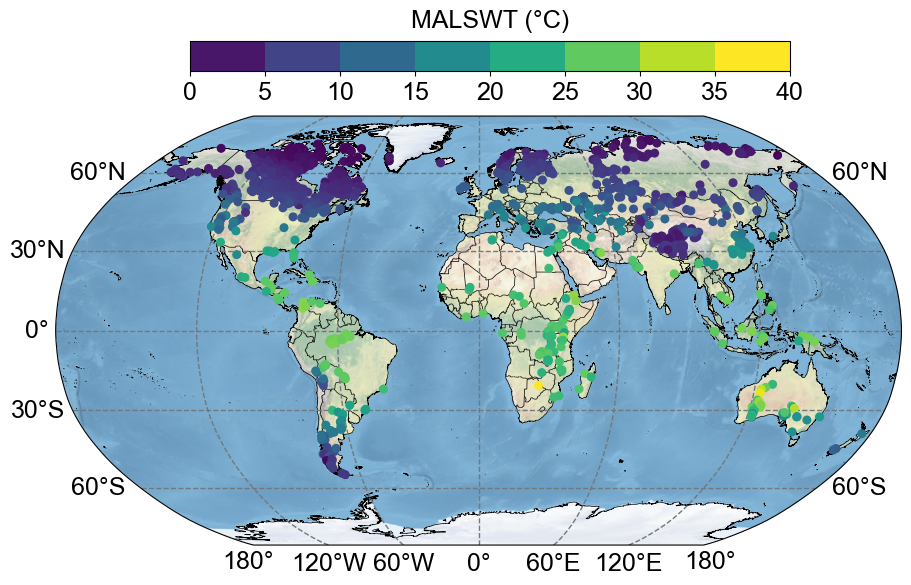

In [4]:
print(df['lswt_ann_avg'].max(),
      df['lswt_ann_avg'].min())

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18  # Set the font size

cmap = plt.cm.get_cmap('viridis')

fig = plt.figure(figsize=(15, 15))
grid = plt.GridSpec(53, 6, wspace=0.8, hspace=1)

# MAP, subplot (a)
ax1 = plt.subplot(grid[0:20, 0:], projection=ccrs.Robinson())
ax1.stock_img()
res = '10m'
ax1.add_feature(cfeature.LAND.with_scale(res), facecolor='w')
ax1.add_feature(cfeature.OCEAN.with_scale(res), facecolor='#C7EFFF')
ax1.add_feature(cfeature.BORDERS.with_scale(res), zorder=1, linewidth=0.5)
ax1.add_feature(cfeature.COASTLINE.with_scale(res), zorder=2, linewidth=0.5)

gridliner = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, linestyle='--', color='#71797E')
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = True  
gridliner.xlines = True  
gridliner.xlabel_style = {'size': 18, 'color': 'k'}
gridliner.ylabel_style = {'size': 18, 'color': 'k'}

scatter = ax1.scatter(df['center_long'],
                      df['center_lat'],
                      c=df['lswt_ann_avg'], 
                      marker='.',
                      s=120,
                      cmap=cmap,
                      zorder=3,
                      transform=ccrs.PlateCarree(),
                      ) 

# Create the colorbar at the top of the figure
bounds = np.arange(0, 41, 5)  # Include 36.3 in the range
cbar_ax = fig.add_axes([0.32, 0.91, 0.4, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal', boundaries=bounds)
cbar.ax.xaxis.set_ticks_position('bottom')  # Move ticks to the top
cbar.ax.xaxis.set_label_position('top')  # Move label to the top
cbar.ax.set_title('MALSWT (°C)', fontsize=18, pad=10)

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

# plt.savefig("map1_070624.png", dpi=1000, facecolor='white', bbox_inches='tight')
plt.show()


## Figure 1c

34.363598 -14.271393


/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_59931/996173005.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma')


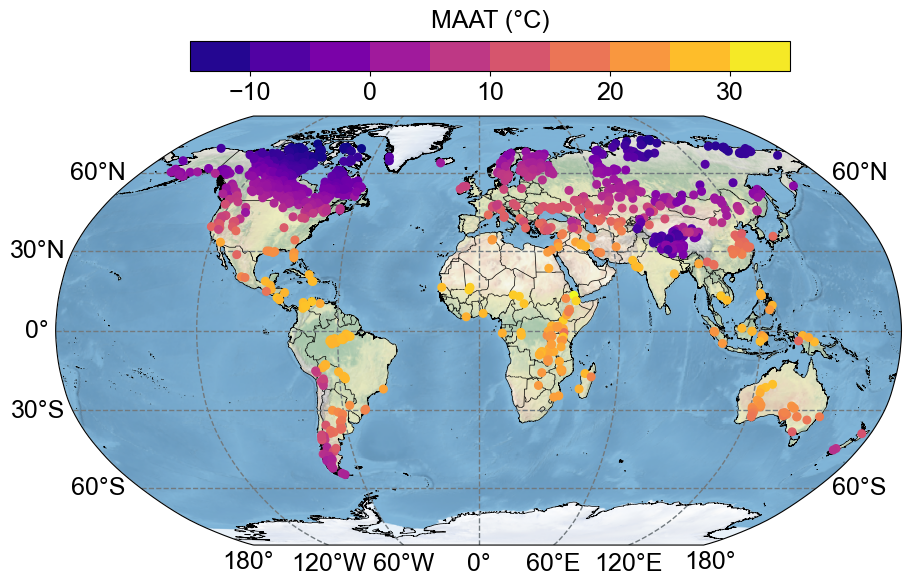

In [5]:
print(df['tas_ann_avg'].max(),
      df['tas_ann_avg'].min())

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18  # Set the font size



cmap = plt.cm.get_cmap('plasma')
 

###########

fig = plt.figure(figsize = (15,15))
grid = plt.GridSpec(53, 6, wspace=0.8, hspace=1)

#MAP, subplot (a)
ax1 = plt.subplot(grid[0:20, 0:], projection=ccrs.Robinson())
ax1.stock_img()
res = '10m'
ax1.add_feature(cfeature.LAND.with_scale(res), facecolor = 'w')
ax1.add_feature(cfeature.OCEAN.with_scale(res), facecolor = '#C7EFFF')
ax1.add_feature(cfeature.BORDERS.with_scale(res), zorder = 1, linewidth = 0.5)
ax1.add_feature(cfeature.COASTLINE.with_scale(res), zorder = 2, linewidth = 0.5)

gridliner = ax1.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 1, linestyle = '--', color = '#71797E')
gridliner.xlabels_top = False
gridliner.xlabels_bottom = True
gridliner.ylabels_left = True
gridliner.ylabels_right = False
gridliner.ylines = True  
gridliner.xlines = True  
gridliner.xlabel_style = {'size': 18, 'color': 'k'}
gridliner.ylabel_style = {'size': 18, 'color': 'k'}


scatter = ax1.scatter(df['center_long'],
                      df['center_lat'],
                      c=df['tas_ann_avg'], 
                      marker = '.',
                      s = 120,
                      cmap = cmap,
                      zorder = 3,
                      transform=ccrs.PlateCarree(),
                      ) 


# Create the colorbar at the top of the figure
bounds = np.arange(-15, 36, 5)  # Include 36.3 in the range

cbar_ax = fig.add_axes([0.32, 0.91, 0.4, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal', boundaries=bounds)
cbar.ax.xaxis.set_ticks_position('bottom')  # Move ticks to the top
cbar.ax.xaxis.set_label_position('top')  # Move label to the top

# Add a title to the colorbar
cbar.ax.set_title('MAAT (°C)', fontsize=18, pad=10)

plt.tick_params(axis = 'x', labelsize = 18)
plt.tick_params(axis = 'y', labelsize = 18)


# plt.savefig("map2_070624.png", dpi = 1000, facecolor = 'white', bbox_inches='tight')
plt.show() 

## Figure 1d

In [6]:
# Create bins for latitude
lat_bins = pd.cut(df['center_lat'], bins=range(-90, 91, 5))  # Adjust bin size as needed

# Count the number of lakes in each bin
lake_counts = df.groupby(lat_bins).size()

# Calculate the mean LSWT and TAS for each latitude bin
mean_lswt = df.groupby(lat_bins)['lswt_ann_avg'].mean()
ao_lswt = df.groupby(lat_bins)['lswt_ao_avg'].mean()
amj_lswt = df.groupby(lat_bins)['lswt_amj_avg'].mean()
jja_lswt = df.groupby(lat_bins)['lswt_jja_avg'].mean()
warmest_lswt = df.groupby(lat_bins)['lswt_warmest_avg'].mean()
mean_tas = df.groupby(lat_bins)['tas_ann_avg'].mean()
abs_lat = df['abs_lat']
# Combine the results into a DataFrame
result = pd.DataFrame({
    'No_of_lakes': lake_counts,
    'lswt_ann_avg': mean_lswt,
    'tas_ann_avg': mean_tas
}).reset_index()

# Convert the bin edges to numeric values
result['center_lat'] = result['center_lat'].apply(lambda x: x.left).astype(float)  # Use the left edge of each bin for plotting

result_seasonal = pd.DataFrame({
    'No_of_lakes': lake_counts,
    'lswt_ann_avg': mean_lswt,
    'lswt_ao_avg': ao_lswt,
    'lswt_amj_avg': amj_lswt,
    'lswt_jja_avg': jja_lswt,
    'lswt_warmest_avg': warmest_lswt,
    'tas_ann_avg': mean_tas
}).reset_index()

# Convert the bin edges to numeric values
result_seasonal['center_lat'] = result_seasonal['center_lat'].apply(lambda x: x.left).astype(float)  # Use the left edge of each bin for plotting

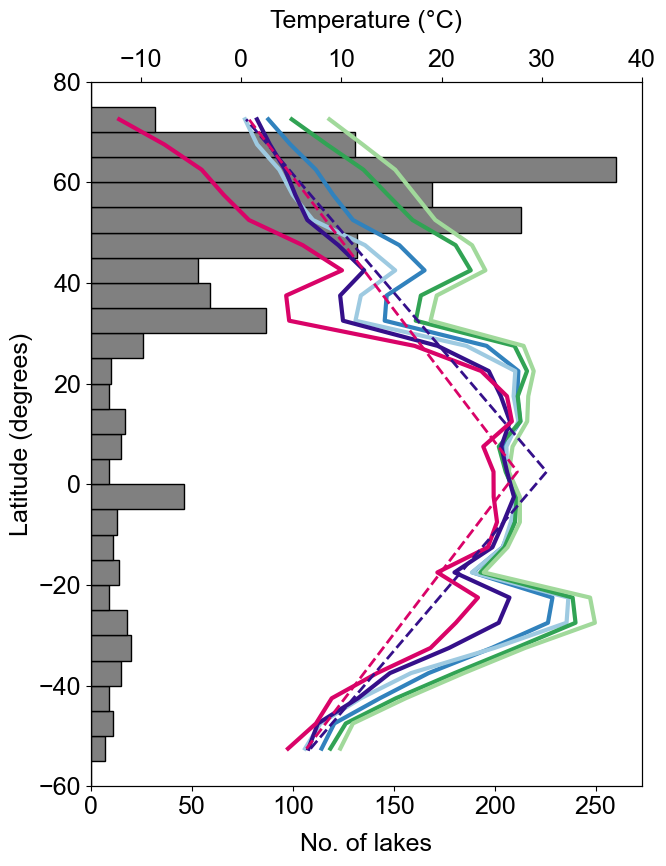

Slope of the LSWT trend line (absolute values): -0.4282 °C per degree of absolute latitude
Slope of the MAAT trend line (absolute values): -0.3827 °C per degree of absolute latitude
Slope of the LSWT trend line: -0.4282 °C per degree of latitude
P-value of the LSWT trend line slope: 0.0000 (Significant: True)
Slope of the MAAT trend line: -0.3827 °C per degree of latitude
P-value of the MAAT trend line slope: 0.0000 (Significant: True)


In [11]:
# Remove rows with NaN values in the relevant columns
result_clean = result.dropna(subset=['center_lat', 'lswt_ann_avg', 'tas_ann_avg'])

# Reshape the Latitude data for fitting both LSWT and MAAT
# Use the absolute values of latitude for the regression
X = np.abs(result_clean['center_lat'].values.reshape(-1, 1))

# For LSWT (Lake Surface Water Temperature)
y_lswt = np.abs(result_clean['lswt_ann_avg'].values)
reg_lswt = LinearRegression().fit(X, y_lswt)
y_pred_lswt = reg_lswt.predict(X)
slope_lswt = reg_lswt.coef_[0]

# For MAAT (Mean Annual Air Temperature)
y_tas = np.abs(result_clean['tas_ann_avg'].values)
reg_tas = LinearRegression().fit(X, y_tas)
y_pred_tas = reg_tas.predict(X)
slope_tas = reg_tas.coef_[0]

# Plotting
fig, ax1 = plt.subplots(figsize=(7, 9))

# Create the histogram on the first y-axis
bar_width = 5
ax1.barh(result['center_lat'] + bar_width / 2, result['No_of_lakes'], height=bar_width, edgecolor='k', color='grey', label='No. of lakes')
ax1.set_xlabel('No. of lakes', labelpad=10)
ax1.set_ylabel('Latitude (degrees)')

# Create the second x-axis for temperature lines
ax2 = ax1.twiny()

# Plot the seasonal LSWT lines
gray1 = plt.cm.tab20c(0)
gray2 = plt.cm.tab20c(2)
gray3 = plt.cm.tab20c(8)
gray4 = plt.cm.tab20c(10)

ax2.plot(result_seasonal['lswt_ao_avg'], result_seasonal['center_lat'] + bar_width / 2, color=gray1, linestyle='-',  linewidth=3,label='AO LSWT')
ax2.plot(result_seasonal['lswt_amj_avg'], result_seasonal['center_lat'] + bar_width / 2, color=gray2, linestyle='-', linewidth=3, label='AMJ LSWT')
ax2.plot(result_seasonal['lswt_jja_avg'], result_seasonal['center_lat'] + bar_width / 2, color=gray3, linestyle='-',  linewidth=3,label='JJA LSWT')
ax2.plot(result_seasonal['lswt_warmest_avg'], result_seasonal['center_lat'] + bar_width / 2, color=gray4, linestyle='-', linewidth=3, label='Warmest LSWT')

# Plot LSWT in purple and MAAT in magenta
ax2.plot(result_clean['lswt_ann_avg'], result_clean['center_lat'] + bar_width / 2, color='#35108A', linewidth=3, linestyle='-', label='Annual LSWT')
ax2.plot(result_clean['tas_ann_avg'], result_clean['center_lat'] + bar_width / 2, color='#d90368', linewidth=3, linestyle='-', label='Annual MAAT')

# Add trend line for LSWT (purple) with absolute values
ax2.plot(np.abs(y_pred_lswt), result_clean['center_lat'] + bar_width / 2, color='#35108A', linestyle='--', linewidth=2, label='|LSWT Trend Line|')

# Add trend line for MAAT (magenta) with absolute values
ax2.plot(np.abs(y_pred_tas), result_clean['center_lat'] + bar_width / 2, color='#d90368', linestyle='--', linewidth=2, label='|MAAT Trend Line|')

# Set the x-axis limits and labels
ax2.set_xlim(-15, 40)
ax2.set_xlabel('Temperature (°C)', labelpad=15)

# Adjust y-axis limits for latitude
ax1.set_ylim(-60, 80)

# Show the legend to differentiate the lines
# ax2.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('histogram_070624.png', dpi=300, bbox_inches='tight')
plt.show()

# Output the slopes of the trend lines for both LSWT and MAAT
print(f"Slope of the LSWT trend line (absolute values): {slope_lswt:.4f} °C per degree of absolute latitude")
print(f"Slope of the MAAT trend line (absolute values): {slope_tas:.4f} °C per degree of absolute latitude")

# For LSWT (Lake Surface Water Temperature)
X_with_const_lswt = sm.add_constant(X)  # Add an intercept to the model
model_lswt = sm.OLS(y_lswt, X_with_const_lswt)
results_lswt = model_lswt.fit()
p_value_lswt = results_lswt.pvalues[1]  # Get the p-value for the slope (the second coefficient)

# For MAAT (Mean Annual Air Temperature)
X_with_const_tas = sm.add_constant(X)  # Add an intercept to the model
model_tas = sm.OLS(y_tas, X_with_const_tas)
results_tas = model_tas.fit()
p_value_tas = results_tas.pvalues[1]  # Get the p-value for the slope (the second coefficient)

# Output the slopes of the trend lines and their p-values for both LSWT and MAAT
print(f"Slope of the LSWT trend line: {slope_lswt:.4f} °C per degree of latitude")
print(f"P-value of the LSWT trend line slope: {p_value_lswt:.4f} (Significant: {p_value_lswt < 0.05})")

print(f"Slope of the MAAT trend line: {slope_tas:.4f} °C per degree of latitude")
print(f"P-value of the MAAT trend line slope: {p_value_tas:.4f} (Significant: {p_value_tas < 0.05})")


In [28]:
# # Remove rows with NaN values in the relevant columns
# result_clean = result.dropna(subset=['center_lat', 'lswt_ann_avg', 'tas_ann_avg'])

# # Step 1: Define Latitude Bands (5-degree intervals)
# result_clean['lat_band'] = pd.cut(result_clean['center_lat'], bins=np.arange(-90, 95, 5), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each latitude band
# result_clean['difference'] = result_clean['lswt_ann_avg'] - result_clean['tas_ann_avg']

# # Calculate the mean difference within each latitude band
# mean_diff_by_band = result_clean.groupby('lat_band')['difference'].mean().reset_index()

# # Step 3: Output the results
# print("Mean Difference between LSWT and MAAT for each 5-degree Latitude Band:")
# print(mean_diff_by_band)

# # Now you can also plot these mean differences if you want

# fig, ax = plt.subplots(figsize=(8, 10))

# ax.barh(mean_diff_by_band['lat_band'].astype(str), mean_diff_by_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (LSWT - MAAT) [°C]')
# ax.set_ylabel('Latitude Band (degrees)')
# ax.set_title('Mean Difference between LSWT and MAAT across Latitude Bands')

# plt.tight_layout()
# plt.show()


In [ ]:
# # Remove rows with NaN values in the relevant columns
# result_clean = result_seasonal.dropna(subset=['center_lat', 'lswt_ao_avg', 'tas_ann_avg'])

# # Step 1: Define Latitude Bands (5-degree intervals)
# result_clean['lat_band'] = pd.cut(result_clean['center_lat'], bins=np.arange(-90, 95, 5), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each latitude band
# result_clean['difference'] = result_clean['lswt_ao_avg'] - result_clean['tas_ann_avg']

# # Calculate the mean difference within each latitude band
# mean_diff_by_band = result_clean.groupby('lat_band')['difference'].mean().reset_index()

# # Step 3: Output the results
# print("Mean Difference between AO LSWT and MAAT for each 5-degree Latitude Band:")
# print(mean_diff_by_band)

# # Now you can also plot these mean differences if you want

# fig, ax = plt.subplots(figsize=(8, 10))

# ax.barh(mean_diff_by_band['lat_band'].astype(str), mean_diff_by_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (AO LSWT - MAAT) [°C]')
# ax.set_ylabel('Latitude Band (degrees)')
# ax.set_title('Mean Difference between AO LSWT and MAAT across Latitude Bands')

# plt.tight_layout()
# plt.show()


In [ ]:
# # Remove rows with NaN values in the relevant columns
# result_clean = result_seasonal.dropna(subset=['center_lat', 'lswt_amj_avg', 'tas_ann_avg'])

# # Step 1: Define Latitude Bands (5-degree intervals)
# result_clean['lat_band'] = pd.cut(result_clean['center_lat'], bins=np.arange(-90, 95, 5), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each latitude band
# result_clean['difference'] = result_clean['lswt_amj_avg'] - result_clean['tas_ann_avg']

# # Calculate the mean difference within each latitude band
# mean_diff_by_band = result_clean.groupby('lat_band')['difference'].mean().reset_index()

# # Step 3: Output the results
# print("Mean Difference between AMJ LSWT and MAAT for each 5-degree Latitude Band:")
# print(mean_diff_by_band)

# # Now you can also plot these mean differences if you want

# fig, ax = plt.subplots(figsize=(8, 10))

# ax.barh(mean_diff_by_band['lat_band'].astype(str), mean_diff_by_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (AMJ LSWT - MAAT) [°C]')
# ax.set_ylabel('Latitude Band (degrees)')
# ax.set_title('Mean Difference between AMJ LSWT and MAAT across Latitude Bands')

# plt.tight_layout()
# plt.show()


In [ ]:
# # Assuming 'result' DataFrame is already defined in your script

# # Remove rows with NaN values in the relevant columns
# result_clean = result_seasonal.dropna(subset=['center_lat', 'lswt_jja_avg', 'tas_ann_avg'])

# # Step 1: Define Latitude Bands (5-degree intervals)
# result_clean['lat_band'] = pd.cut(result_clean['center_lat'], bins=np.arange(-90, 95, 5), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each latitude band
# result_clean['difference'] = result_clean['lswt_jja_avg'] - result_clean['tas_ann_avg']

# # Calculate the mean difference within each latitude band
# mean_diff_by_band = result_clean.groupby('lat_band')['difference'].mean().reset_index()

# # Step 3: Output the results
# print("Mean Difference between JJA LSWT and MAAT for each 5-degree Latitude Band:")
# print(mean_diff_by_band)

# # Now you can also plot these mean differences if you want

# fig, ax = plt.subplots(figsize=(8, 10))

# ax.barh(mean_diff_by_band['lat_band'].astype(str), mean_diff_by_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (JJA LSWT - MAAT) [°C]')
# ax.set_ylabel('Latitude Band (degrees)')
# ax.set_title('Mean Difference between JJA LSWT and MAAT across Latitude Bands')

# plt.tight_layout()
# plt.show()


In [13]:
# # Assuming 'result' DataFrame is already defined in your script

# # Remove rows with NaN values in the relevant columns
# result_clean = result_seasonal.dropna(subset=['center_lat', 'lswt_warmest_avg', 'tas_ann_avg'])

# # Step 1: Define Latitude Bands (5-degree intervals)
# result_clean['lat_band'] = pd.cut(result_clean['center_lat'], bins=np.arange(-90, 95, 5), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each latitude band
# result_clean['difference'] = result_clean['lswt_warmest_avg'] - result_clean['tas_ann_avg']

# # Calculate the mean difference within each latitude band
# mean_diff_by_band = result_clean.groupby('lat_band')['difference'].mean().reset_index()

# # Step 3: Output the results
# print("Mean Difference between Warmest LSWT and MAAT for each 5-degree Latitude Band:")
# print(mean_diff_by_band)

# # Now you can also plot these mean differences if you want

# fig, ax = plt.subplots(figsize=(8, 10))

# ax.barh(mean_diff_by_band['lat_band'].astype(str), mean_diff_by_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (Warmest LSWT - MAAT) [°C]')
# ax.set_ylabel('Latitude Band (degrees)')
# ax.set_title('Mean Difference between JJA LSWT and MAAT across Latitude Bands')

# plt.tight_layout()
# plt.show()


In [30]:
# Create bins for latitude (grouping into 5-degree intervals)
lat_bins = pd.cut(df['center_lat'], bins=range(-90, 91, 5))

# Define seasons for analysis
seasons = ['lswt_ann_avg', 'lswt_ao_avg', 'lswt_amj_avg', 'lswt_jja_avg', 'lswt_warmest_avg']
seasonal_diffs_filtered = {}

# Loop through each season to calculate the max, min, and mean differences for filtered latitudes
for season in seasons:
    mean_lswt = df.groupby(lat_bins)[season].mean()
    mean_tas = df.groupby(lat_bins)['tas_ann_avg'].mean()

    # Calculate the difference between LSWT and TAS for each bin
    diff = mean_lswt - mean_tas
    
    # Get the interval boundaries from the latitude bins
    latitude_intervals = diff.index.categories

    # Filter latitude bins for 0° to 30° and > 35°
    filtered_diff_0_to_30 = diff[(latitude_intervals.left >= 0) & (latitude_intervals.right <= 30)]
    filtered_diff_above_35 = diff[(latitude_intervals.left > 35)]
    
    # Calculate the maximum, minimum, and mean difference for the filtered latitudes
    max_diff_0_to_30 = filtered_diff_0_to_30.max()
    min_diff_0_to_30 = filtered_diff_0_to_30.min()
    mean_diff_0_to_30 = filtered_diff_0_to_30.mean()

    max_diff_above_35 = filtered_diff_above_35.max()
    min_diff_above_35 = filtered_diff_above_35.min()
    mean_diff_above_35 = filtered_diff_above_35.mean()

    seasonal_diffs_filtered[season] = {
        "0 to 30": {
            "max_diff": max_diff_0_to_30, "min_diff": min_diff_0_to_30, "mean_diff": mean_diff_0_to_30
        },
        "> 35": {
            "max_diff": max_diff_above_35, "min_diff": min_diff_above_35, "mean_diff": mean_diff_above_35
        }
    }

# Print the results for latitudes between 0° to 30° and greater than 35°
for season, diffs in seasonal_diffs_filtered.items():
    print(f"{season}:")
    print("  0 to 30° latitude:")
    print(f"    Largest difference: {diffs['0 to 30']['max_diff']}")
    print(f"    Smallest difference: {diffs['0 to 30']['min_diff']}")
    print(f"    Mean difference: {diffs['0 to 30']['mean_diff']}")
    print("  > 35° latitude:")
    print(f"    Largest difference: {diffs['> 35']['max_diff']}")
    print(f"    Smallest difference: {diffs['> 35']['min_diff']}")
    print(f"    Mean difference: {diffs['> 35']['mean_diff']}")


lswt_ann_avg:
  0 to 30° latitude:
    Largest difference: 2.296139861538464
    Smallest difference: -0.6115188518518551
    Mean difference: 0.898630188433606
  > 35° latitude:
    Largest difference: 13.748176223958334
    Smallest difference: 2.2166694062893093
    Mean difference: 7.334665423272277
lswt_ao_avg:
  0 to 30° latitude:
    Largest difference: 7.185123378021977
    Smallest difference: 0.8320784033613471
    Mean difference: 2.680575594516267
  > 35° latitude:
    Largest difference: 14.87935181919643
    Smallest difference: 8.239901661455526
    Mean difference: 11.146402381679176
lswt_amj_avg:
  0 to 30° latitude:
    Largest difference: 5.16838345128205
    Smallest difference: 0.6432268627450988
    Mean difference: 2.256259203572426
  > 35° latitude:
    Largest difference: 12.555467890625
    Smallest difference: 5.308257456603775
    Mean difference: 7.763487722796378
lswt_jja_avg:
  0 to 30° latitude:
    Largest difference: 9.969921912820514
    Smallest diff

## Figure 1e

In [25]:
# Create bins for elevation
elev_bins = pd.cut(df['Elevation'], bins=range(-500, 5500, 250))  # Adjust bin size as needed

# Count the number of lakes in each bin
lake_counts = df.groupby(elev_bins).size()

# Calcueleve the mean LSWT and TAS for each elevitude bin
mean_lswt = df.groupby(elev_bins)['lswt_ann_avg'].mean()
ao_lswt = df.groupby(elev_bins)['lswt_ao_avg'].mean()
amj_lswt = df.groupby(elev_bins)['lswt_amj_avg'].mean()
jja_lswt = df.groupby(elev_bins)['lswt_jja_avg'].mean()
warmest_lswt = df.groupby(elev_bins)['lswt_warmest_avg'].mean()
mean_tas = df.groupby(elev_bins)['tas_ann_avg'].mean()

mean_elev = df.groupby(elev_bins)['Elevation'].mean()

# Combine the results into a DataFrame
result = pd.DataFrame({
    'No_of_lakes': lake_counts,
    'lswt_ann_avg': mean_lswt,
    'tas_ann_avg': mean_tas
}).reset_index()

# Convert the bin edges to numeric values
result['Elevation'] = result['Elevation'].apply(lambda x: x.left).astype(float)  # Use the left edge of each bin for plotting

result_seasonal = pd.DataFrame({
    'No_of_lakes': lake_counts,
    'lswt_ann_avg': mean_lswt,
    'lswt_ao_avg': ao_lswt,
    'lswt_amj_avg': amj_lswt,
    'lswt_jja_avg': jja_lswt,
    'lswt_warmest_avg': warmest_lswt,
    'tas_ann_avg': mean_tas,
}).reset_index()

# Convert the bin edges to numeric values
result_seasonal['Elevation'] = result_seasonal['Elevation'].apply(lambda x: x.left).astype(float)  # Use the left edge of each bin for plotting

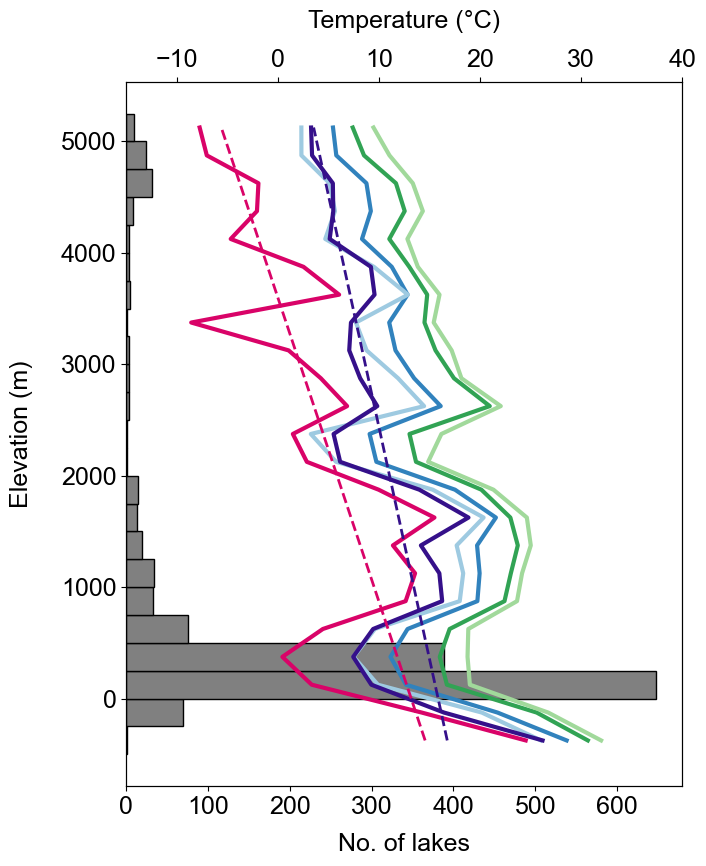

Slope of the LSWT trend line: -0.0024 °C per degree of latitude
P-value of the LSWT trend line slope: 0.0000 (Significant: True)
Slope of the MAAT trend line: -0.0037 °C per degree of latitude
P-value of the MAAT trend line slope: 0.0000 (Significant: True)


In [26]:
# Reshape the Elevation data for fitting both LSWT and MAAT
X = result['Elevation'].values.reshape(-1, 1)

# For LSWT (Lake Surface Water Temperature)
y_lswt = result['lswt_ann_avg'].values
reg_lswt = LinearRegression().fit(X, y_lswt)
y_pred_lswt = reg_lswt.predict(X)
slope_lswt = reg_lswt.coef_[0]


# For MAAT (Mean Annual Air Temperature)
y_tas = result['tas_ann_avg'].values
reg_tas = LinearRegression().fit(X, y_tas)
y_pred_tas = reg_tas.predict(X)
slope_tas = reg_tas.coef_[0]

# Plotting
fig, ax1 = plt.subplots(figsize=(7.4, 9))

# Create the histogram on the first y-axis
bar_width = 250
ax1.barh(result['Elevation'] + bar_width / 2, result['No_of_lakes'], height=bar_width, edgecolor='k', color='grey', label='No. of lakes')
ax1.set_xlabel('No. of lakes', labelpad=10)
ax1.set_ylabel('Elevation (m)', labelpad=20)

# Create the second x-axis for temperature lines
ax2 = ax1.twiny()

# Plot LSWT for the different seasons
gray1 = plt.cm.tab20c(0)
gray2 = plt.cm.tab20c(2)
gray3 = plt.cm.tab20c(8)
gray4 = plt.cm.tab20c(10)

ax2.plot(result_seasonal['lswt_ao_avg'], result_seasonal['Elevation'] + bar_width / 2, color=gray1, linestyle='-',  linewidth=3, label='AO LSWT')
ax2.plot(result_seasonal['lswt_amj_avg'], result_seasonal['Elevation'] + bar_width / 2, color=gray2, linestyle='-',  linewidth=3, label='AMJ LSWT')
ax2.plot(result_seasonal['lswt_jja_avg'], result_seasonal['Elevation'] + bar_width / 2, color=gray3, linestyle='-',  linewidth=3, label='JJA LSWT')
ax2.plot(result_seasonal['lswt_warmest_avg'], result_seasonal['Elevation'] + bar_width / 2, color=gray4, linestyle='-',  linewidth=3, label='Warmest LSWT')

# Plot the annual LSWT with magenta and MAAT with violet
ax2.plot(result['lswt_ann_avg'], result['Elevation'] + bar_width / 2, color='#35108A', linestyle='-', linewidth=3, label='Annual LSWT')
ax2.plot(result['tas_ann_avg'], result['Elevation'] + bar_width / 2, color='#d90368', linestyle='-', linewidth=3,  label='Annual MAAT')

# Add black trend line for LSWT
ax2.plot(y_pred_lswt, result['Elevation'] + bar_width / 2, color='#35108A', linestyle='--', linewidth=2, label='LSWT Trend Line')

# Add black trend line for MAAT
ax2.plot(y_pred_tas, result['Elevation'] + bar_width / 2, color='#d90368', linestyle='--', linewidth=2,  label='MAAT Trend Line')

# Set the x-axis limits and labels
ax2.set_xlim(-15, 40)
ax2.set_xlabel('Temperature (°C)', labelpad=15)

# Show the legend to differentiate the lines
# ax2.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('histogram_091124.png', dpi=300, bbox_inches='tight')
plt.show()

# Output the slopes of the trend lines and their p-values for both LSWT and MAAT
print(f"Slope of the LSWT trend line: {slope_lswt:.4f} °C per degree of latitude")
print(f"P-value of the LSWT trend line slope: {p_value_lswt:.4f} (Significant: {p_value_lswt < 0.05})")

print(f"Slope of the MAAT trend line: {slope_tas:.4f} °C per degree of latitude")
print(f"P-value of the MAAT trend line slope: {p_value_tas:.4f} (Significant: {p_value_tas < 0.05})")

In [27]:
# Create bins for elevation categories
elev_bins = pd.cut(df['Elevation'], bins=[-500, 500, 2000, 4000, 5500], labels=['Low (<500m)', 'Mid (500-2000m)', 'High (2000-4000m)', 'Very High (>4000m)'])

# Define seasons for analysis
seasons = ['lswt_ann_avg', 'lswt_ao_avg', 'lswt_amj_avg', 'lswt_jja_avg', 'lswt_warmest_avg']
seasonal_diffs_filtered = {}

# Loop through each season to calculate the max, min, and mean differences for filtered elevations
for season in seasons:
    mean_lswt = df.groupby(elev_bins)[season].mean()
    mean_tas = df.groupby(elev_bins)['tas_ann_avg'].mean()

    # Calculate the difference between LSWT and TAS for each bin
    diff = mean_lswt - mean_tas
    
    # Get the interval labels from the elevation bins
    elevation_labels = diff.index

    # Calculate the maximum, minimum, and mean difference for each elevation category
    for elev in elevation_labels:
        max_diff = diff[elev].max()
        min_diff = diff[elev].min()
        mean_diff = diff[elev].mean()

        # Store the results in the dictionary
        if elev not in seasonal_diffs_filtered:
            seasonal_diffs_filtered[elev] = {}
        seasonal_diffs_filtered[elev][season] = {
            "max_diff": max_diff, "min_diff": min_diff, "mean_diff": mean_diff
        }

# Print the results for the defined elevation categories
for elevation, diffs in seasonal_diffs_filtered.items():
    print(f"Elevation: {elevation}")
    for season, stats in diffs.items():
        print(f"  {season}:")
        print(f"    Largest difference: {stats['max_diff']}")
        print(f"    Smallest difference: {stats['min_diff']}")
        print(f"    Mean difference: {stats['mean_diff']}")


Elevation: Low (<500m)
  lswt_ann_avg:
    Largest difference: 6.05024650265822
    Smallest difference: 6.05024650265822
    Mean difference: 6.05024650265822
  lswt_ao_avg:
    Largest difference: 9.684913492531091
    Smallest difference: 9.684913492531091
    Mean difference: 9.684913492531091
  lswt_amj_avg:
    Largest difference: 6.68025932317104
    Smallest difference: 6.68025932317104
    Mean difference: 6.68025932317104
  lswt_jja_avg:
    Largest difference: 14.012349820908595
    Smallest difference: 14.012349820908595
    Mean difference: 14.012349820908595
  lswt_warmest_avg:
    Largest difference: 16.37953534127059
    Smallest difference: 16.37953534127059
    Mean difference: 16.37953534127059
Elevation: Mid (500-2000m)
  lswt_ann_avg:
    Largest difference: 3.8660548098201044
    Smallest difference: 3.8660548098201044
    Mean difference: 3.8660548098201044
  lswt_ao_avg:
    Largest difference: 7.568218453055177
    Smallest difference: 7.568218453055177
    Mea

In [ ]:
# # Remove rows with NaN values in the relevant columns
# result_clean = result.dropna(subset=['Elevation', 'lswt_ann_avg', 'tas_ann_avg'])

# # Step 1: Define Elevation Bands (250-meter intervals)
# # Assuming 'elevation' is in meters in the dataset
# result_clean['elev_band'] = pd.cut(result_clean['Elevation'], bins=np.arange(0, result_clean['Elevation'].max() + 250, 250), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each elevation band
# result_clean['difference'] = result_clean['lswt_ann_avg'] - result_clean['tas_ann_avg']

# # Step 3: Calculate the mean difference within each elevation band
# mean_diff_by_elev_band = result_clean.groupby('elev_band')['difference'].mean().reset_index()

# # Step 4: Output the results
# print("Mean Difference between LSWT and MAAT for each 250-meter Elevation Band:")
# print(mean_diff_by_elev_band)

# # Step 5: Plot the results (Optional)
# fig, ax = plt.subplots(figsize=(8, 10))

# # Plot mean difference for each elevation band
# ax.barh(mean_diff_by_elev_band['elev_band'].astype(str), mean_diff_by_elev_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (LSWT - MAAT) [°C]')
# ax.set_ylabel('Elevation Band (meters)')
# ax.set_title('Mean Difference between LSWT and MAAT across Elevation Bands')

# plt.tight_layout()
# plt.show()


In [ ]:
# # Remove rows with NaN values in the relevant columns
# result_clean = result_seasonal.dropna(subset=['Elevation', 'lswt_ao_avg', 'tas_ann_avg'])

# # Step 1: Define Elevation Bands (250-meter intervals)
# # Assuming 'elevation' is in meters in the dataset
# result_clean['elev_band'] = pd.cut(result_clean['Elevation'], bins=np.arange(0, result_clean['Elevation'].max() + 250, 250), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each elevation band
# result_clean['difference'] = result_clean['lswt_ao_avg'] - result_clean['tas_ann_avg']

# # Step 3: Calculate the mean difference within each elevation band
# mean_diff_by_elev_band = result_clean.groupby('elev_band')['difference'].mean().reset_index()

# # Step 4: Output the results
# print("Mean Difference between AO LSWT and MAAT for each 250-meter Elevation Band:")
# print(mean_diff_by_elev_band)

# # Step 5: Plot the results (Optional)
# fig, ax = plt.subplots(figsize=(8, 10))

# # Plot mean difference for each elevation band
# ax.barh(mean_diff_by_elev_band['elev_band'].astype(str), mean_diff_by_elev_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (LSWT - MAAT) [°C]')
# ax.set_ylabel('Elevation Band (meters)')
# ax.set_title('Mean Difference between AO LSWT and MAAT across Elevation Bands')

# plt.tight_layout()
# plt.show()


In [ ]:
# # Remove rows with NaN values in the relevant columns
# result_clean = result_seasonal.dropna(subset=['Elevation', 'lswt_amj_avg', 'tas_ann_avg'])

# # Step 1: Define Elevation Bands (250-meter intervals)
# # Assuming 'elevation' is in meters in the dataset
# result_clean['elev_band'] = pd.cut(result_clean['Elevation'], bins=np.arange(0, result_clean['Elevation'].max() + 250, 250), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each elevation band
# result_clean['difference'] = result_clean['lswt_amj_avg'] - result_clean['tas_ann_avg']

# # Step 3: Calculate the mean difference within each elevation band
# mean_diff_by_elev_band = result_clean.groupby('elev_band')['difference'].mean().reset_index()

# # Step 4: Output the results
# print("Mean Difference between AMJ LSWT and MAAT for each 250-meter Elevation Band:")
# print(mean_diff_by_elev_band)

# # Step 5: Plot the results (Optional)
# fig, ax = plt.subplots(figsize=(8, 10))

# # Plot mean difference for each elevation band
# ax.barh(mean_diff_by_elev_band['elev_band'].astype(str), mean_diff_by_elev_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (LSWT - MAAT) [°C]')
# ax.set_ylabel('Elevation Band (meters)')
# ax.set_title('Mean Difference between AMJ LSWT and MAAT across Elevation Bands')

# plt.tight_layout()
# plt.show()


In [ ]:
# # Remove rows with NaN values in the relevant columns
# result_clean = result_seasonal.dropna(subset=['Elevation', 'lswt_jja_avg', 'tas_ann_avg'])

# # Step 1: Define Elevation Bands (250-meter intervals)
# # Assuming 'elevation' is in meters in the dataset
# result_clean['elev_band'] = pd.cut(result_clean['Elevation'], bins=np.arange(0, result_clean['Elevation'].max() + 250, 250), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each elevation band
# result_clean['difference'] = result_clean['lswt_jja_avg'] - result_clean['tas_ann_avg']

# # Step 3: Calculate the mean difference within each elevation band
# mean_diff_by_elev_band = result_clean.groupby('elev_band')['difference'].mean().reset_index()

# # Step 4: Output the results
# print("Mean Difference between JJA LSWT and MAAT for each 250-meter Elevation Band:")
# print(mean_diff_by_elev_band)

# # Step 5: Plot the results (Optional)
# fig, ax = plt.subplots(figsize=(8, 10))

# # Plot mean difference for each elevation band
# ax.barh(mean_diff_by_elev_band['elev_band'].astype(str), mean_diff_by_elev_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (LSWT - MAAT) [°C]')
# ax.set_ylabel('Elevation Band (meters)')
# ax.set_title('Mean Difference between JJA LSWT and MAAT across Elevation Bands')

# plt.tight_layout()
# plt.show()


In [ ]:
# # Remove rows with NaN values in the relevant columns
# result_clean = result_seasonal.dropna(subset=['Elevation', 'lswt_warmest_avg', 'tas_ann_avg'])

# # Step 1: Define Elevation Bands (250-meter intervals)
# # Assuming 'elevation' is in meters in the dataset
# result_clean['elev_band'] = pd.cut(result_clean['Elevation'], bins=np.arange(0, result_clean['Elevation'].max() + 250, 250), right=False)

# # Step 2: Calculate the difference between LSWT and MAAT within each elevation band
# result_clean['difference'] = result_clean['lswt_warmest_avg'] - result_clean['tas_ann_avg']

# # Step 3: Calculate the mean difference within each elevation band
# mean_diff_by_elev_band = result_clean.groupby('elev_band')['difference'].mean().reset_index()

# # Step 4: Output the results
# print("Mean Difference between Warmest LSWT and MAAT for each 250-meter Elevation Band:")
# print(mean_diff_by_elev_band)

# # Step 5: Plot the results (Optional)
# fig, ax = plt.subplots(figsize=(8, 10))

# # Plot mean difference for each elevation band
# ax.barh(mean_diff_by_elev_band['elev_band'].astype(str), mean_diff_by_elev_band['difference'], color='skyblue', edgecolor='k')
# ax.set_xlabel('Mean Difference (LSWT - MAAT) [°C]')
# ax.set_ylabel('Elevation Band (meters)')
# ax.set_title('Mean Difference between Warmest LSWT and MAAT across Elevation Bands')

# plt.tight_layout()
# plt.show()
